# House Prices


https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

In [108]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import exp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [125]:
df = pd.read_csv('train.csv')
dftwo = pd.read_csv('train.csv')
dfthree = pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [110]:
sum(df.duplicated())

0

There are no duplicates in the data

In [111]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


MSZoning: Identifies the general zoning classification of the sale.

Commercial (C) includes Agriculture and Industrial

In [112]:
df["MSZoning"].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [113]:
df.groupby("MSZoning")["SalePrice"].mean()

MSZoning
C (all)     74528.000000
FV         214014.061538
RH         131558.375000
RL         191004.994787
RM         126316.830275
Name: SalePrice, dtype: float64

In [114]:
df.groupby("MSSubClass")["SalePrice"].mean()

MSSubClass
20     185224.811567
30      95829.724638
40     156125.000000
45     108591.666667
50     143302.972222
60     239948.501672
70     166772.416667
75     192437.500000
80     169736.551724
85     147810.000000
90     133541.076923
120    200779.080460
160    138647.380952
180    102300.000000
190    129613.333333
Name: SalePrice, dtype: float64

price < 150,000
200k < price > 150k 
price > 200,000

<AxesSubplot:>

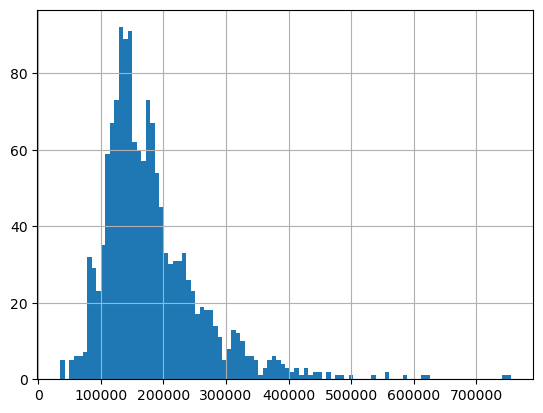

In [115]:
temp = pd.Series(df['SalePrice'])
temp.hist(histtype = 'stepfilled', bins = 100)

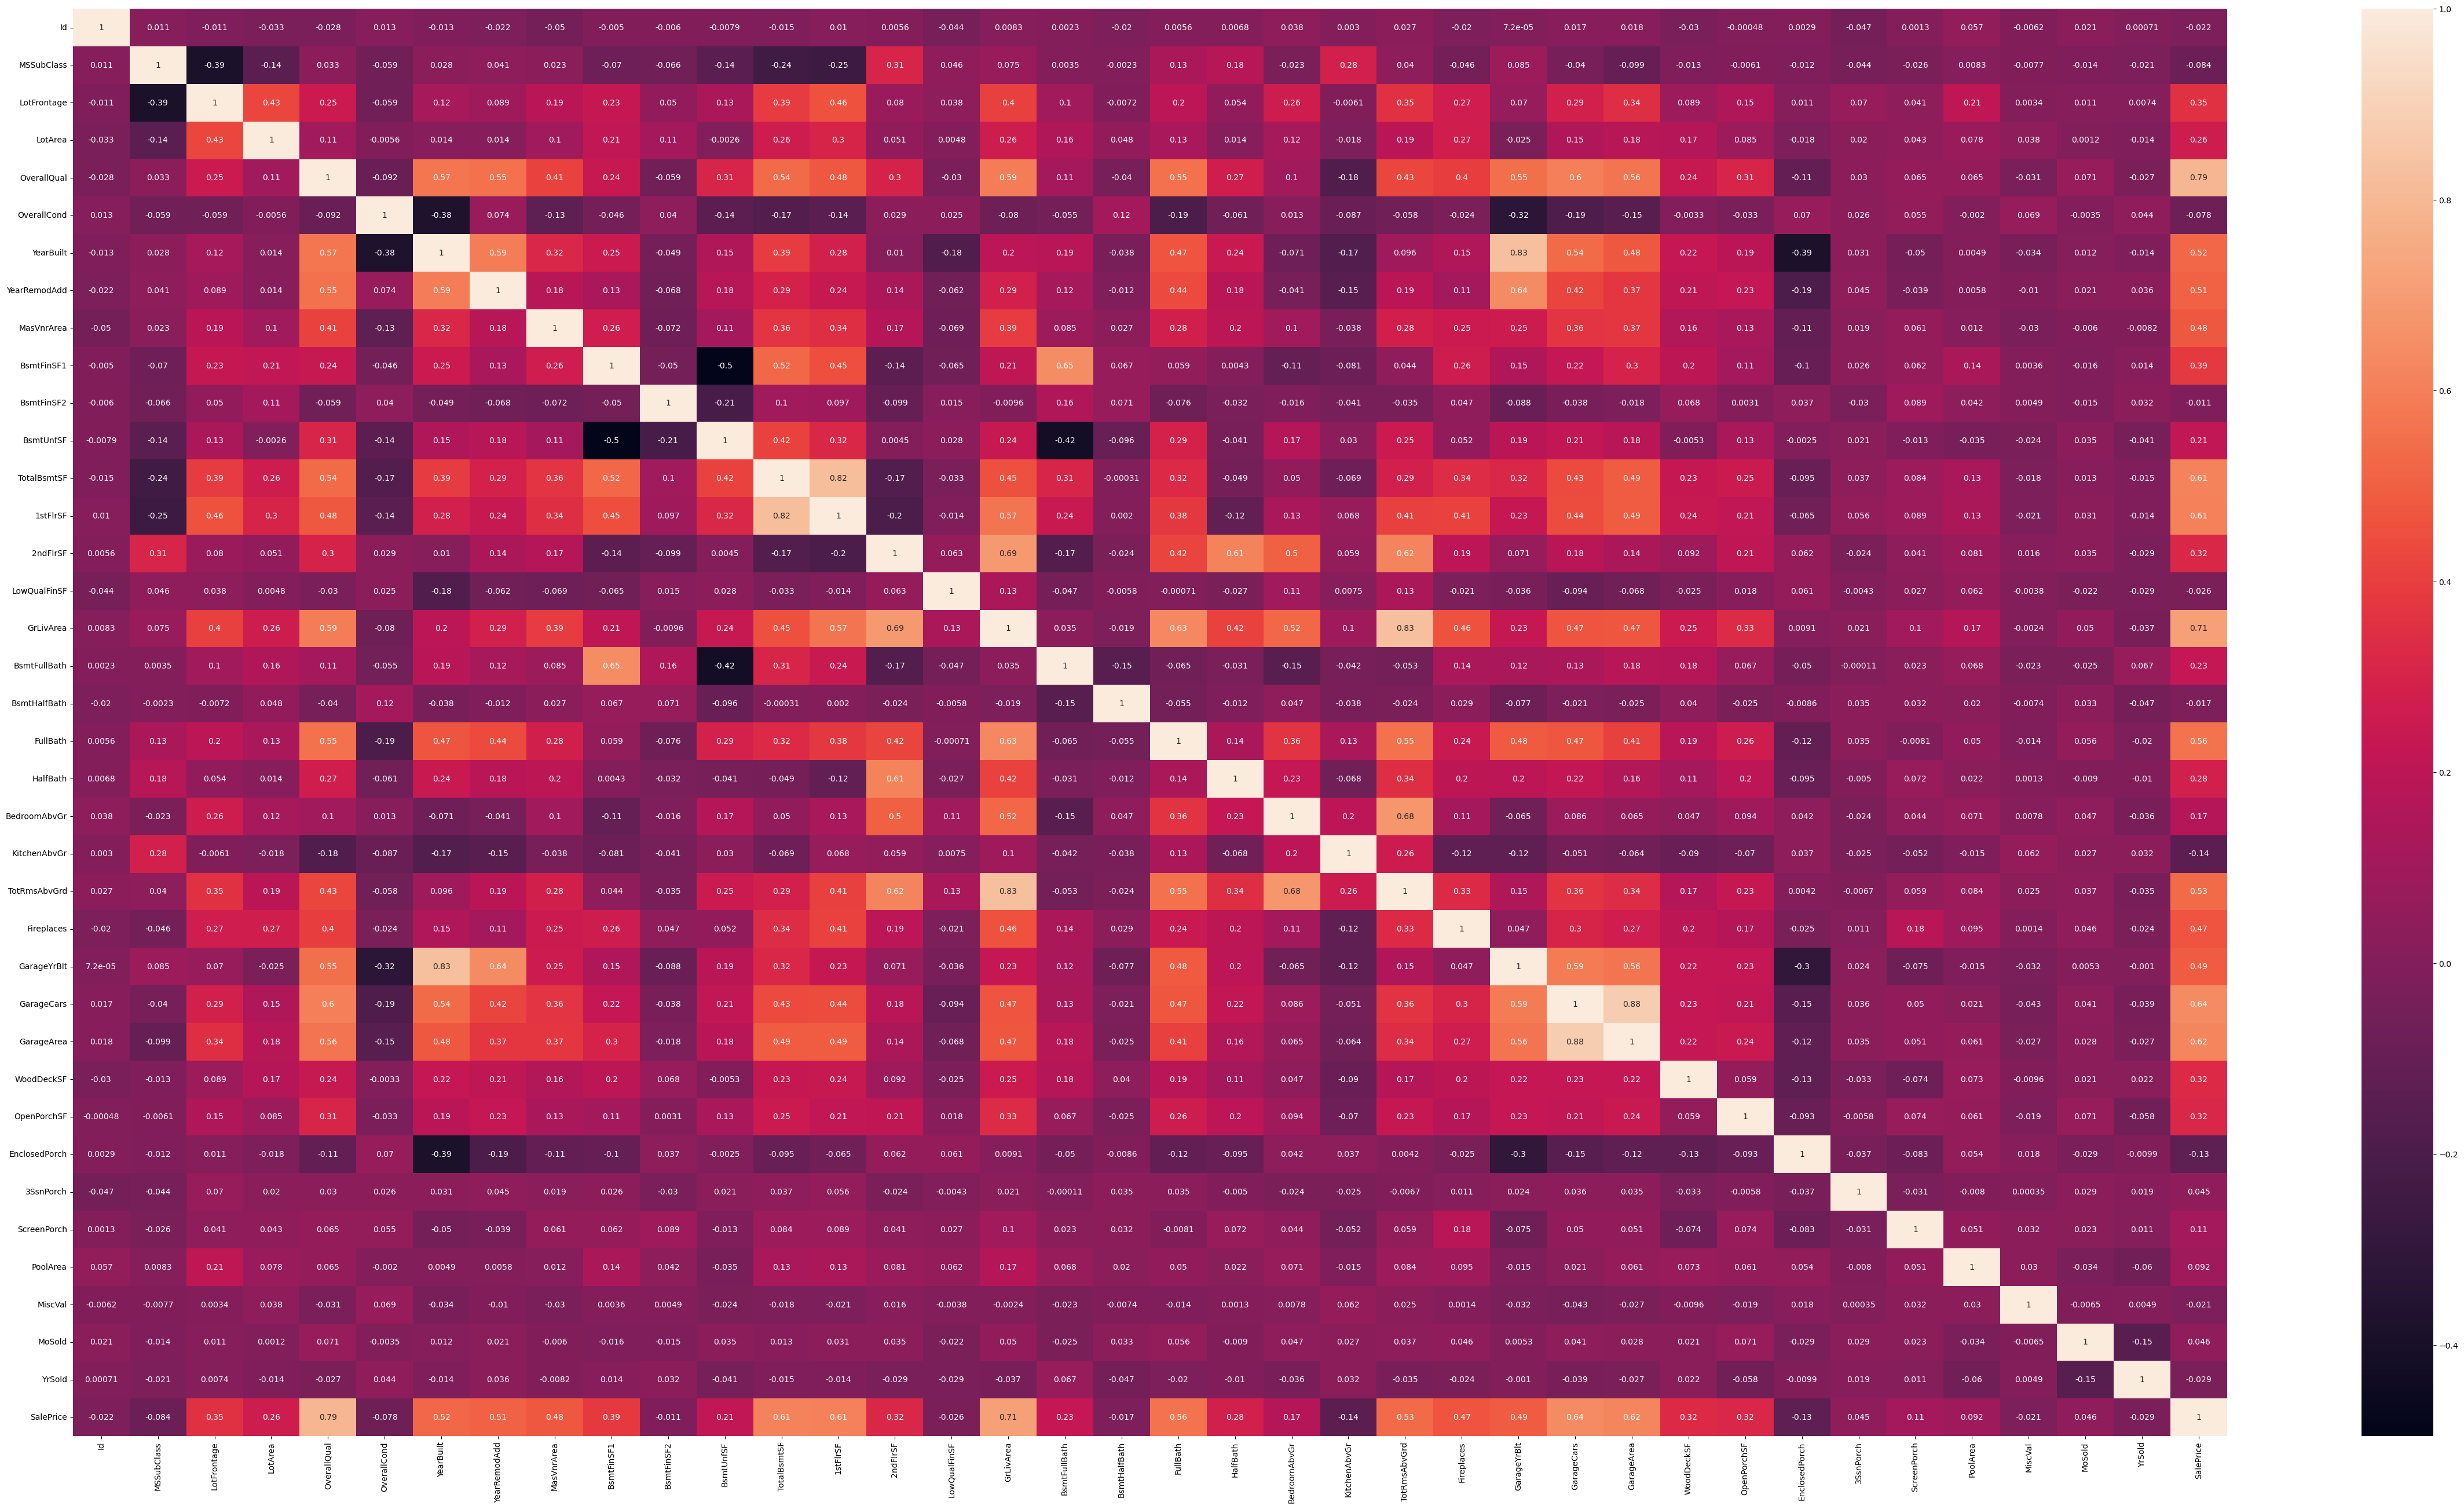

In [116]:
plt.figure(figsize = (60, 32))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [126]:
# Mapping object values to numerical equivalents
df['Street'] = df['Street'].str.strip().map({'Grvl':1,'Pave':2})
df['MSZoning'] = df['MSZoning'].str.strip().map({'A':1,'C':2,'FV':3,'I':4,'RH':5,'RL':6,'RP':7,'RM':8})
df['BldgType'] = df['BldgType'].str.strip().map({'1Fam':1, '2FmCon':2, 'Duplx':3, 'TwnhsE':4, 'TwnhsI':5})

In [127]:
df = df.select_dtypes(exclude=['object'])

In [128]:
df = df.dropna(axis='columns')

In [129]:
y = df.SalePrice;
X = df.iloc[:, df.columns != 'SalePrice']

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=12)

In [137]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [138]:
model = LogisticRegression();
model.fit(X_train_scaled, y_train)
train_accuracy = model.score(X_train_scaled, y_train)
print(f'The accuracy for the training set is {100 * train_accuracy:.2f}%')
test_accuracy = model.score(X_test_scaled, y_test)
print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%')

The accuracy for the training set is 89.18%
The accuracy for the test set is 1.10%


c:\Users\NORIS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# temp = pd.Series(dfthree.target)
# temp.hist(histtype = 'stepfilled', bins = 10)

In [ ]:
dftwo.groupby("ExterQual")["SalePrice"].mean()

In [ ]:
dfthree = dfthree.dropna(axis='columns')
dfthree = dfthree.select_dtypes(exclude=['object'])

In [ ]:
dfthree.head()

In [ ]:
med = np.array(dfthree['SalePrice'] > 150000 ).astype(int)
high = np.array(dfthree["SalePrice"] > 250000 ).astype(int)
categ = med + high

In [ ]:
# X_cal = pd.DataFrame(scale(dfthree))
X_cal_train, X_cal_test, y_cal_train, y_cal_test = train_test_split(dfthree, categ, test_size=0.33, random_state=5)

In [ ]:
cal_model = LogisticRegression()
cal_model.fit(X_cal_train, y_cal_train)

In [ ]:
print(cal_model.classes_)

In [ ]:
train_accuracy = cal_model.score(X_cal_train, y_cal_train)
print(f'The accuracy for the training set is {100 * train_accuracy:.2f}%')
test_accuracy = cal_model.score(X_cal_test, y_cal_test)
print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%')

In [ ]:
probs = cal_model.predict_proba(X_cal_test)
probs[:10]

In [ ]:
print(y_cal_test)

In [ ]:
y_pred_B = cal_model.predict(X_cal_test)
print(classification_report(y_cal_test, y_pred_B))